Text Analysis Using R language

In [1]:
install.packages("tm")
install.packages("SnowballC")
install.packages("wordcloud")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tm)
library(SnowballC)
library(wordcloud)
library(ggplot2)

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [16]:
doc<-c("Data Analysis is fun","tomorrow is my practical and it will be fun","exploring data is fun","Imagine how incredible you will be","if you start working on yourself")

In [17]:
corp<-Corpus(VectorSource(doc))

Now clean the text

In [18]:
corp<-tm_map(corp,content_transformer(tolower))
corp<-tm_map(corp,removePunctuation)
corp<-tm_map(corp,removeNumbers)
corp<-tm_map(corp,removeWords,stopwords("english"))
corp<-tm_map(corp,stripWhitespace)

Warning message in tm_map.SimpleCorpus(corp, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corp, stripWhitespace):
“transformation drops documents”


Now Create Term Document Matrix

In [19]:
tdm=TermDocumentMatrix(corp)
tdm_matrix=as.matrix(tdm)
tdm_matrix

,1,2,3,4,5
analysis,1,0,0,0,0
data,1,0,1,0,0
fun,1,1,1,0,0
practical,0,1,0,0,0
tomorrow,0,1,0,0,0
will,0,1,0,1,0
exploring,0,0,1,0,0
imagine,0,0,0,1,0
incredible,0,0,0,1,0
start,0,0,0,0,1


In [25]:
word_freq<-sort(rowSums(tdm_matrix),decreasing = TRUE)
word_freq

fun       data       will   analysis  practical   tomorrow  exploring 
         3          2          2          1          1          1          1 
   imagine incredible      start    working 
         1          1          1          1

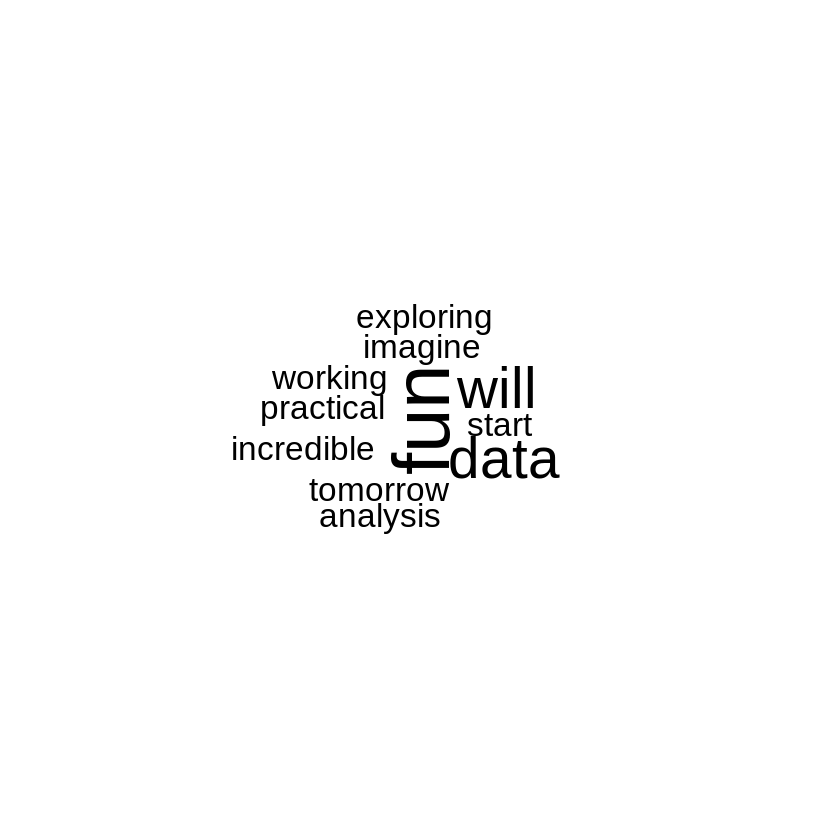

In [21]:
wordcloud(names(word_freq),freq=word_freq,min.freq = 1)

In [26]:
top_5_words<-head(word_freq,5)
top_5_words

fun      data      will  analysis practical 
        3         2         2         1         1

In [23]:
top5_df<-data.frame(Word=names(top_5_words),Frequency=top_5_words)

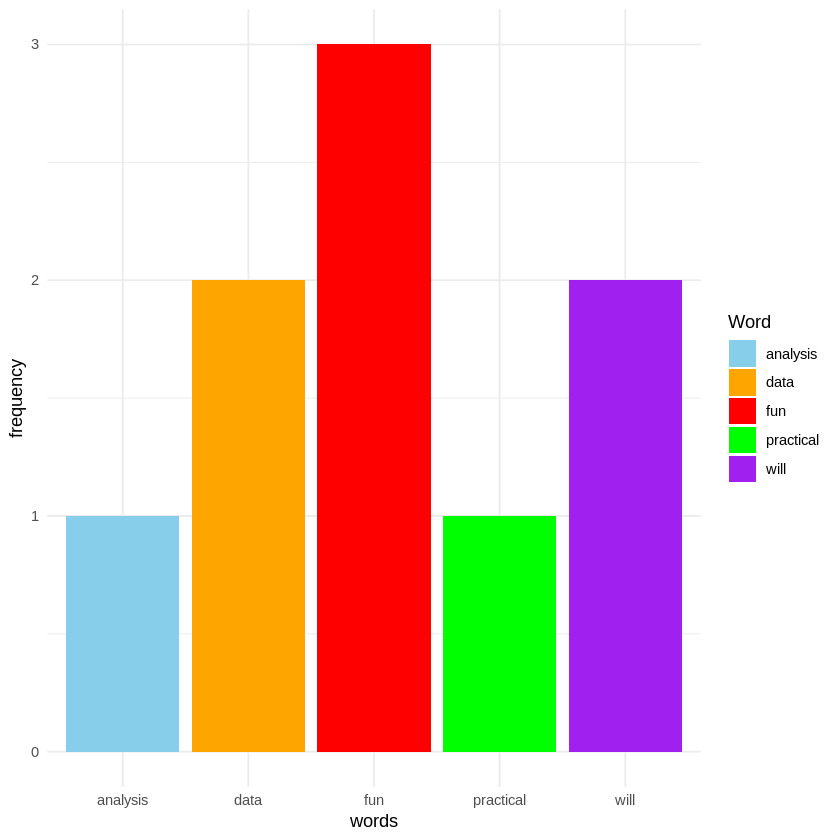

In [27]:
ggplot(top5_df,aes(x=Word,y=Frequency,fill=Word))+geom_bar(stat="identity")+labs(tilte="top 5 frequent words",x="words",y="frequency")+theme_minimal()+scale_fill_manual(values=c("skyblue","orange","red","green","purple"))